<a href="https://colab.research.google.com/github/EvilNerd28/Online-News-Popularity-Predictiton/blob/main/news_popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
import scipy
from scipy.spatial.distance import pdist,cdist
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report,f1_score,confusion_matrix)
import xgboost
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/OnlineNewsPopularity.csv')

# EDA

In [ ]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [ ]:
df.info()

In [ ]:
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
df.drop(columns=['url'],inplace=True)

In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [ ]:
df = df.dropna()

# Data Visualization


<Axes: >

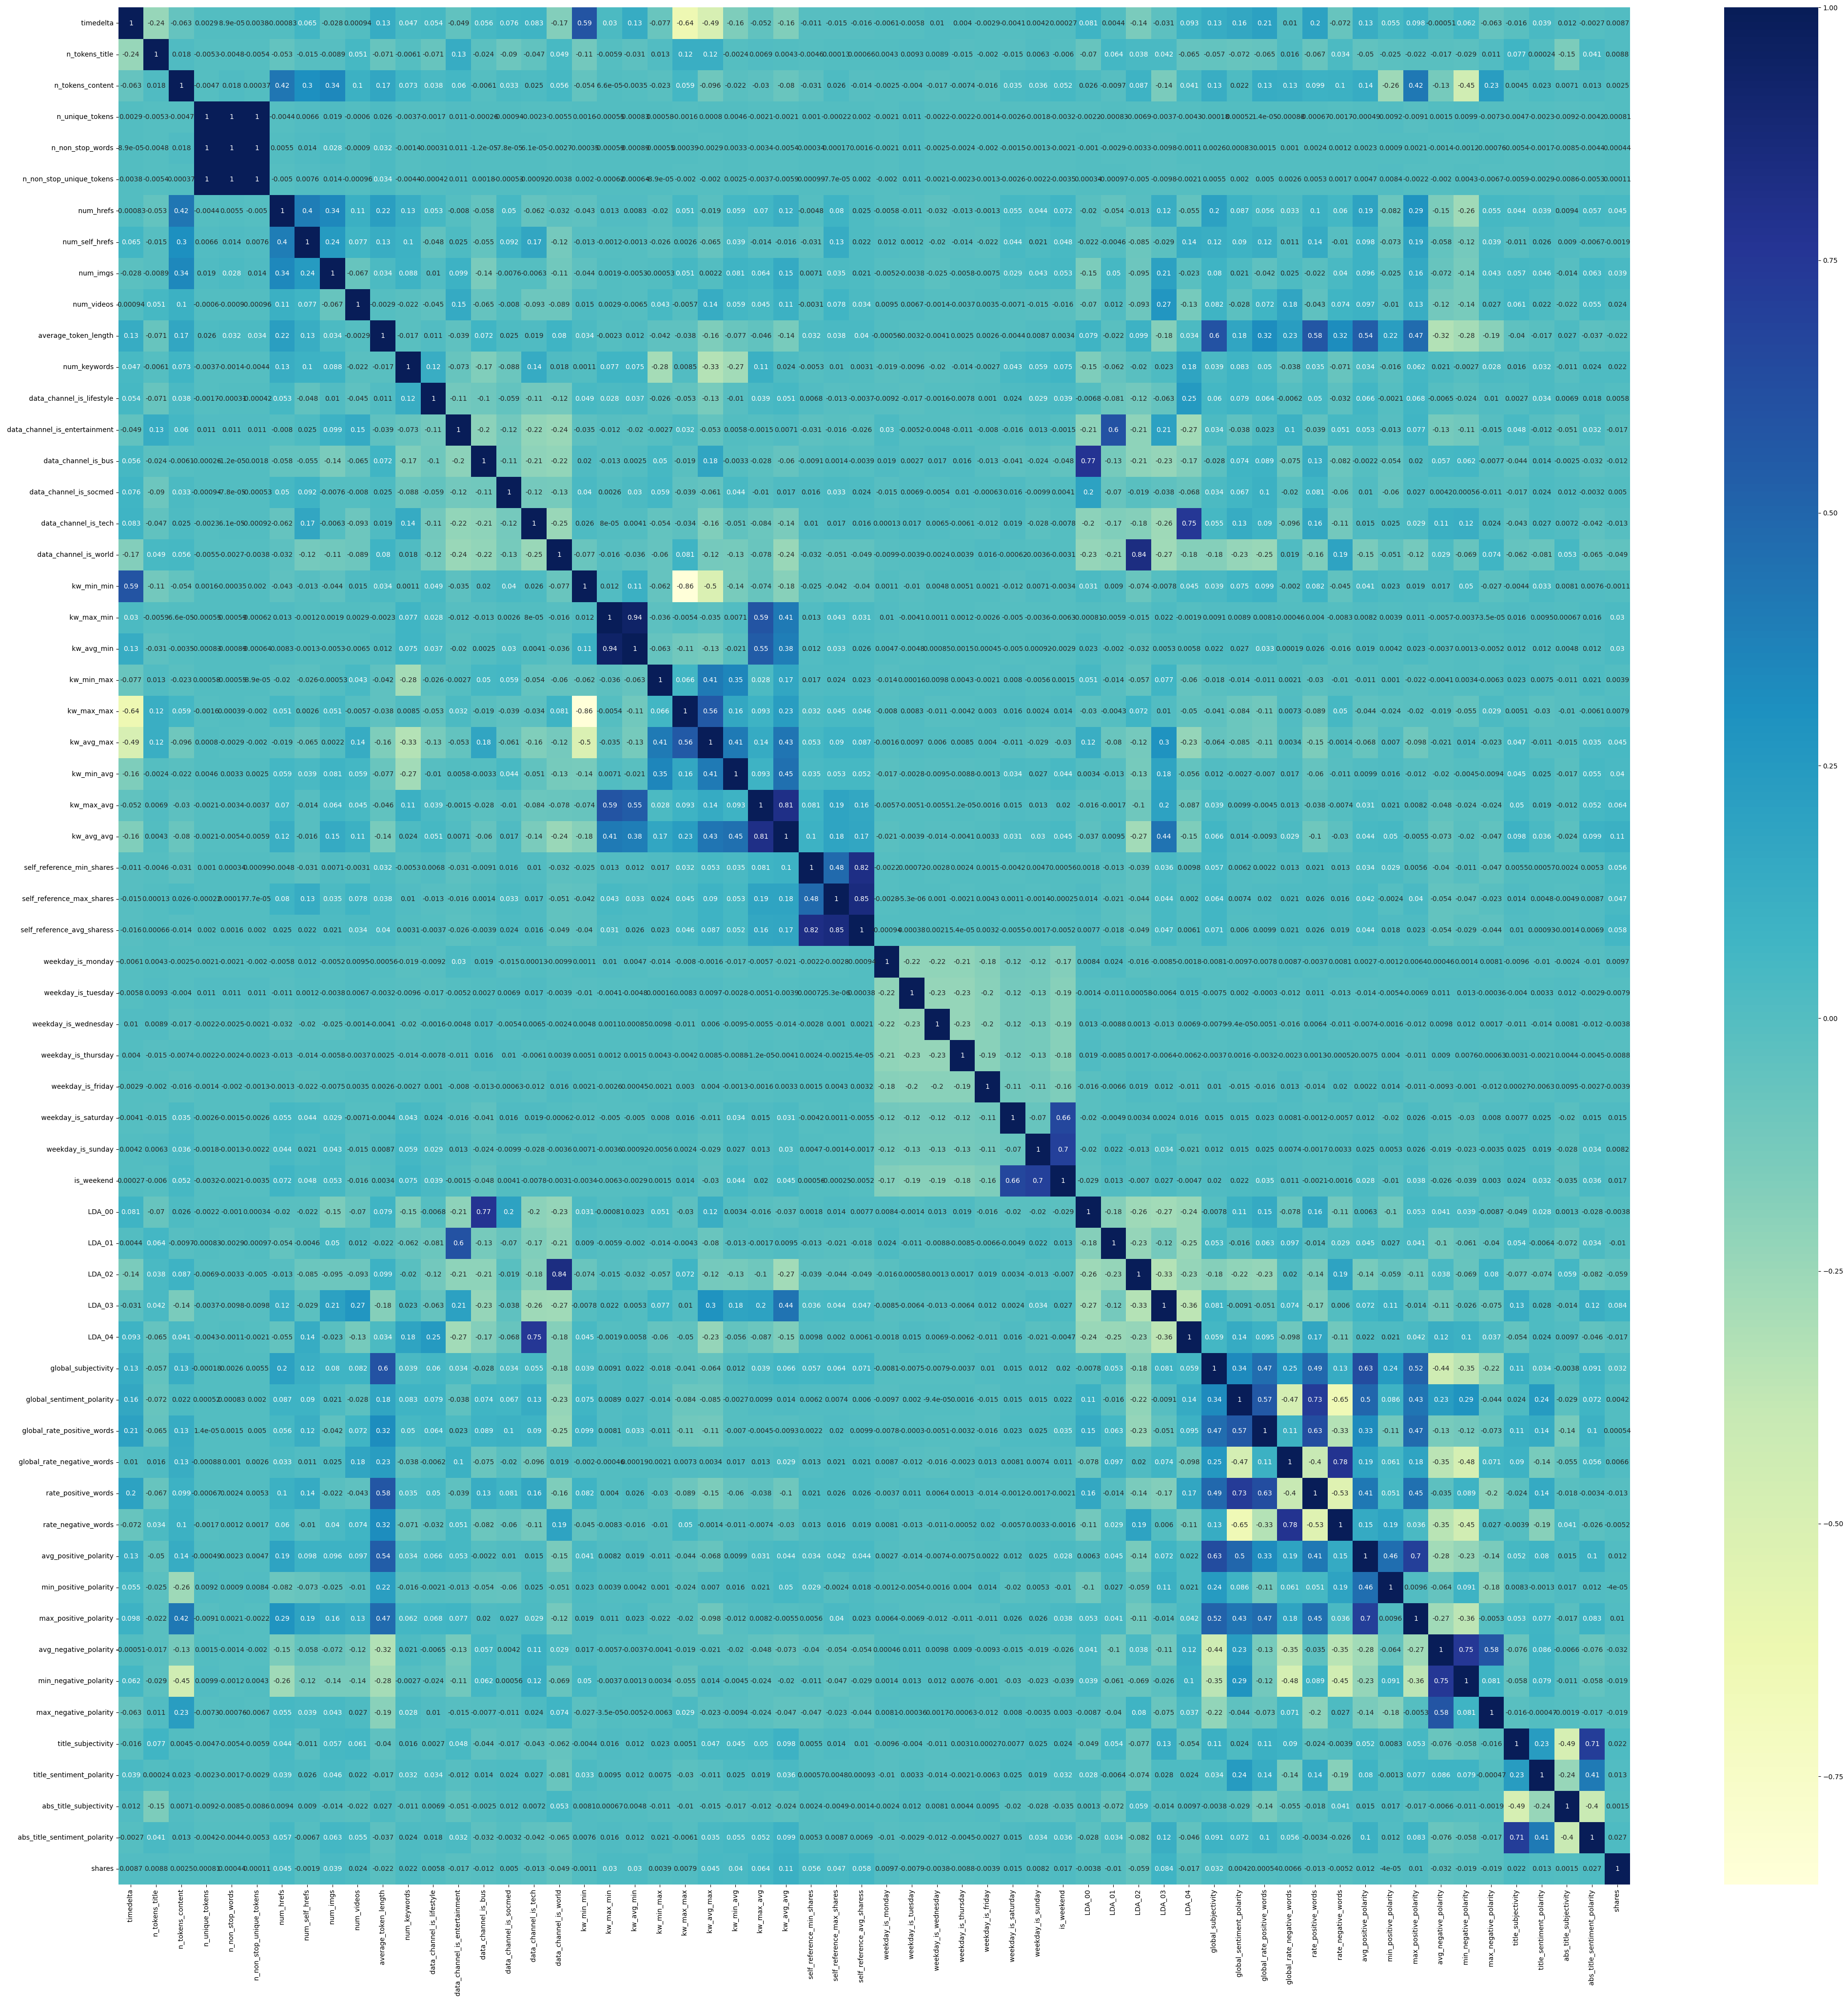

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [ ]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [ ]:
Q1 = df.quantile(q=0.25)

Q3 = df.quantile(q=0.75)

IQR = Q3-Q1
print('IQR for each column:- ')
print(IQR)

In [ ]:
sorted_shares = df.sort_values(' shares')

median = sorted_shares[' shares'].median()

q1 = sorted_shares[' shares'].quantile(q=0.25)

q3 = sorted_shares[' shares'].quantile(q=0.75)

iqr = q3-q1

In [ ]:
Inner_bound1 = q1-(iqr*1.5)
print(f'Inner Boundary 1 = {Inner_bound1}')
Inner_bound2 = q3+(iqr*1.5)
print(f'Inner Boundary 2 = {Inner_bound2}')
Outer_bound1 = q1-(iqr*3)
print(f'Outer Boundary 1 = {Outer_bound1}')
Outer_bound2 = q3+(iqr*3)
print(f'Outer Boundary 2 = {Outer_bound2}')

Inner Boundary 1 = -1835.0
Inner Boundary 2 = 5581.0
Outer Boundary 1 = -4616.0
Outer Boundary 2 = 8362.0


In [ ]:
Df = df[df[' shares']<=Outer_bound2]

In [ ]:
Df.hist(figsize=(30,30))

In [ ]:
a,b = Df[' shares'].mean(),Df[' shares'].median()
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 1916.4932888635808
Median article share = 1300.0


In [ ]:
Weekday = Df.columns.values[30:37]
Weekday

array([' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday'],
      dtype=object)

In [ ]:
#Finding Popular and Unpopular days (MEAN)

unpopular = Df[Df[' shares']<a]
popular = Df[Df[' shares']>=a]

up_day = unpopular[Weekday].sum().values
p_day = popular[Weekday].sum().values

up_day
p_day

array([1803., 1956., 1994., 1997., 1718., 1062., 1095.])

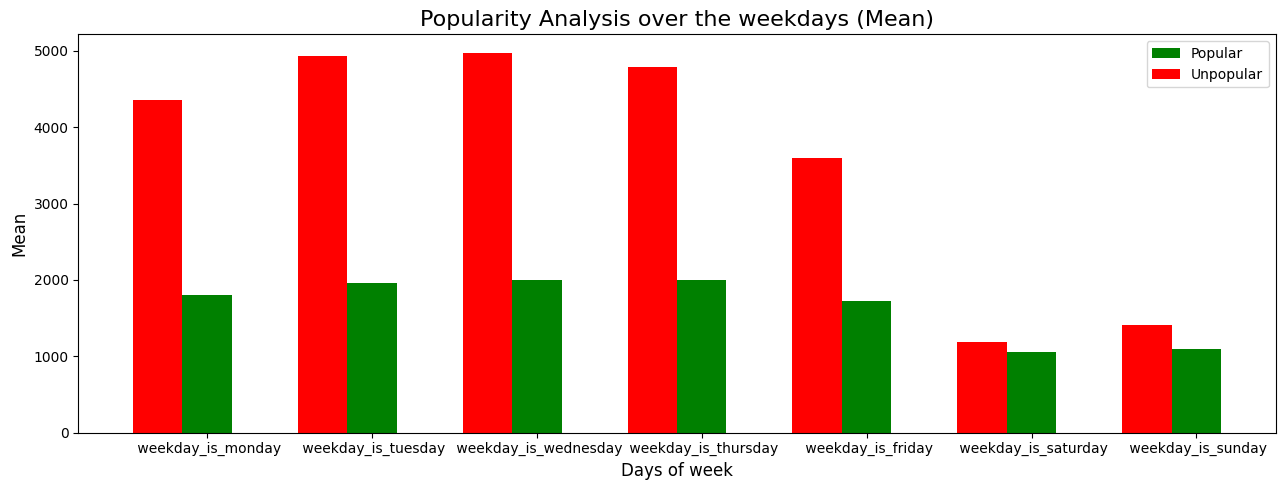

In [ ]:
dig = plt.figure(figsize = (13,5))
plt.title("Popularity Analysis over the weekdays (Mean)", fontsize = 16)
plt.bar(np.arange(len(Weekday)), p_day, width = 0.3, align="center", color = 'g', \
          label = "Popular")
plt.bar(np.arange(len(Weekday)) - 0.3, up_day, width = 0.3, align = "center", color = 'r', \
          label = "Unpopular")
plt.xticks(np.arange(len(Weekday)), Weekday)
plt.ylabel("Mean", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


In [ ]:
#Finding Popular and Unpopular days (MEDIAN)

unpopularM = Df[Df[' shares']<a]
popularM = Df[Df[' shares']>=a]

up_dayM = unpopular[Weekday].sum().values
p_dayM = popular[Weekday].sum().values

up_dayM
p_dayM

array([1803., 1956., 1994., 1997., 1718., 1062., 1095.])

In [ ]:
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)
plt.bar(np.arange(len(Weekday)), p_dayM, width = 0.3, align="center", color = 'g', \
          label = "Popular")
plt.bar(np.arange(len(Weekday)) - 0.3, up_dayM, width = 0.3, align = "center", color = 'r', \
          label = "Unpopular")
plt.xticks(np.arange(len(Weekday)), Weekday)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [ ]:
Dc = Df.columns.values[12:18]

In [ ]:
unpop=Df[Df[' shares']<a]
pop=Df[Df[' shares']>=a]
unpop_day = unpop[Dc].sum().values
pop_day = pop[Dc].sum().values

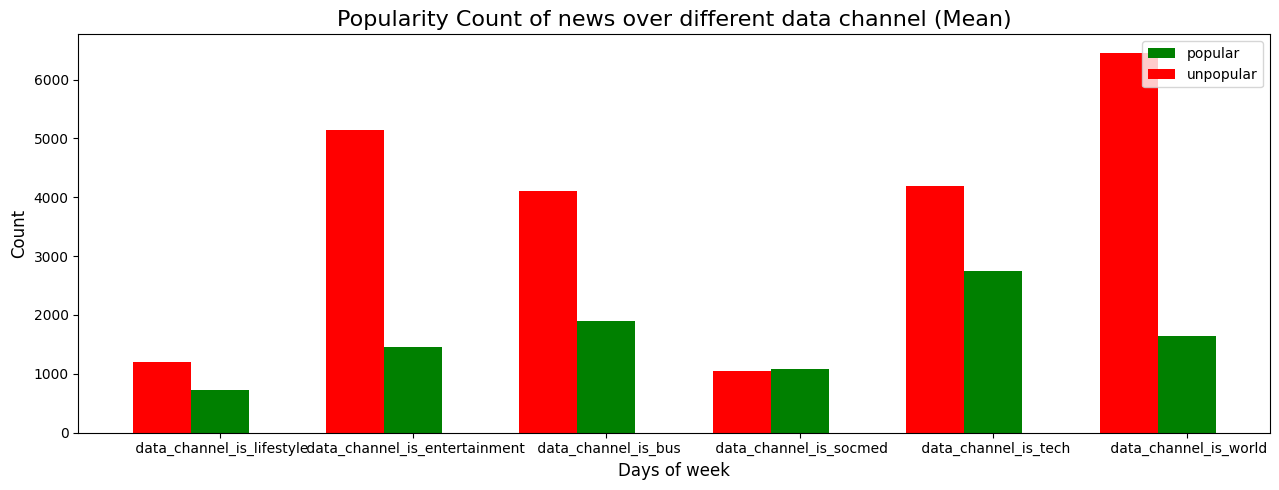

In [ ]:
fig = plt.figure(figsize = (13,5))
plt.title("Popularity Count of news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), pop_day, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'r', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [ ]:
unpopM=Df[Df[' shares']<a]
popM=Df[Df[' shares']>=a]
unpop_dayM = unpop[Dc].sum().values
pop_dayM = pop[Dc].sum().values

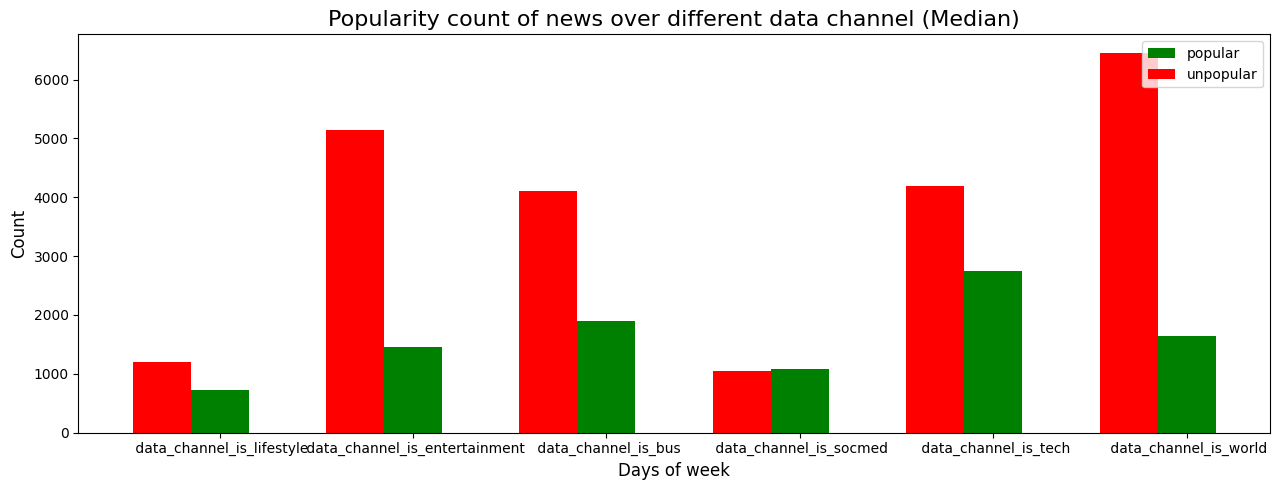

In [ ]:
fig = plt.figure(figsize = (13,5))
plt.title("Popularity count of news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), pop_dayM, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, unpop_dayM, width = 0.3, align = "center", color = 'r', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

# NEERAJ

In [ ]:
Df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
mean = Df[' shares'].mean()

In [ ]:
#Converting output columns to 0 and 1
Df[' shares'] = Df[' shares'].apply(lambda x: 0 if x <mean  else 1)

<ipython-input-75-2e55cfa49378>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df[' shares'] = Df[' shares'].apply(lambda x: 0 if x <mean  else 1)


In [ ]:
Df[' shares'].value_counts()

1100    2308
1200    2018
1300    1740
1400    1592
1500    1323
        ... 
130        1
236        1
192        1
223        1
76         1
Name:  shares, Length: 929, dtype: int64

In [ ]:
#Scaling and Doing SMOTE
X = Df.drop(' shares',axis=1)
y = Df[' shares']

scaler=StandardScaler()
X=scaler.fit_transform(X)
from imblearn.over_sampling import SMOTE
SMOTE().fit_resample(X, y)
X,y = SMOTE().fit_resample(X, y)

In [ ]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
50503    1
50504    1
50505    1
50506    1
50507    1
Name:  shares, Length: 50508, dtype: int64


In [ ]:
def calculateScore(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen.append(TP / (TP + FN))
    Spe.append(TN / (FP + TN))
    FPR.append(FP / (FP + TN))
    FNR.append(FN / (FN + TP))

# Splitting and Training


In [ ]:
train, test, target_train, target_val = train_test_split(X,y,train_size= 0.80,random_state=0);

In [ ]:
#Using multiple classifiers
Model = []
Accuracy= []
F1Score = []
Sen = []
Spe = []
FPR = []
FNR = []

### Logistic Regression

In [ ]:
LR = LogisticRegression(multi_class='auto')
LR.fit(train,target_train)
lr_pred = LR.predict(test)
Model.append('Logistic Regression')
Accuracy.append(accuracy_score(target_val,lr_pred))
F1Score.append(f1_score(target_val,lr_pred,average=None))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: xlabel='Predicted', ylabel='Actual'>

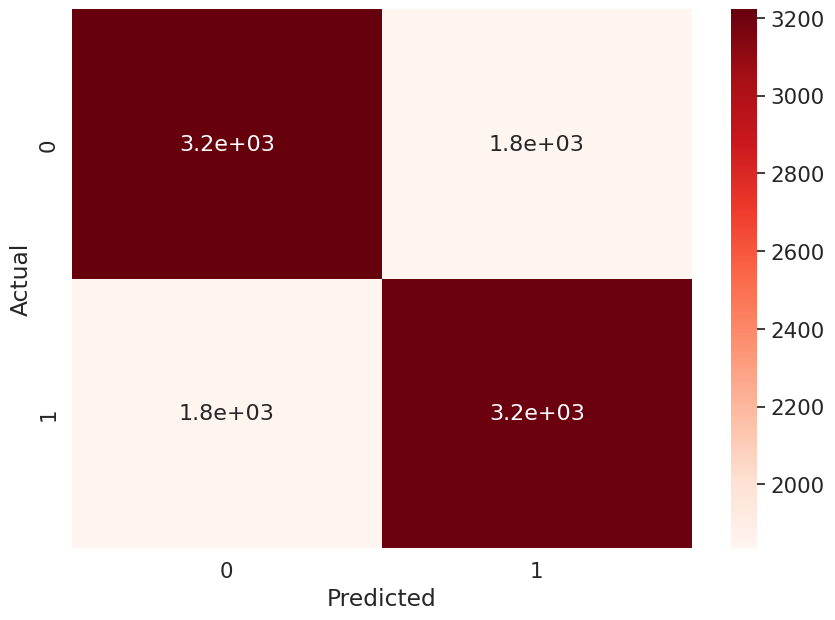

In [ ]:
data = confusion_matrix(target_val,lr_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16})

In [98]:
LR.score(train,target_train)

0.643419294164233

# Decision Tree

In [100]:
params = {

    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,10,1),
    'max_leaf_nodes':range(2,10,1),
}
dt = DecisionTreeClassifier()
rs = RandomizedSearchCV(dt, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)
rs.fit(X,y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'max_leaf_nodes': range(2, 10),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy')

In [101]:
rs.best_params_

{'splitter': 'random',
 'max_leaf_nodes': 3,
 'max_depth': 4,
 'criterion': 'entropy'}

Text(0.5, 0, 'Relative Importance')

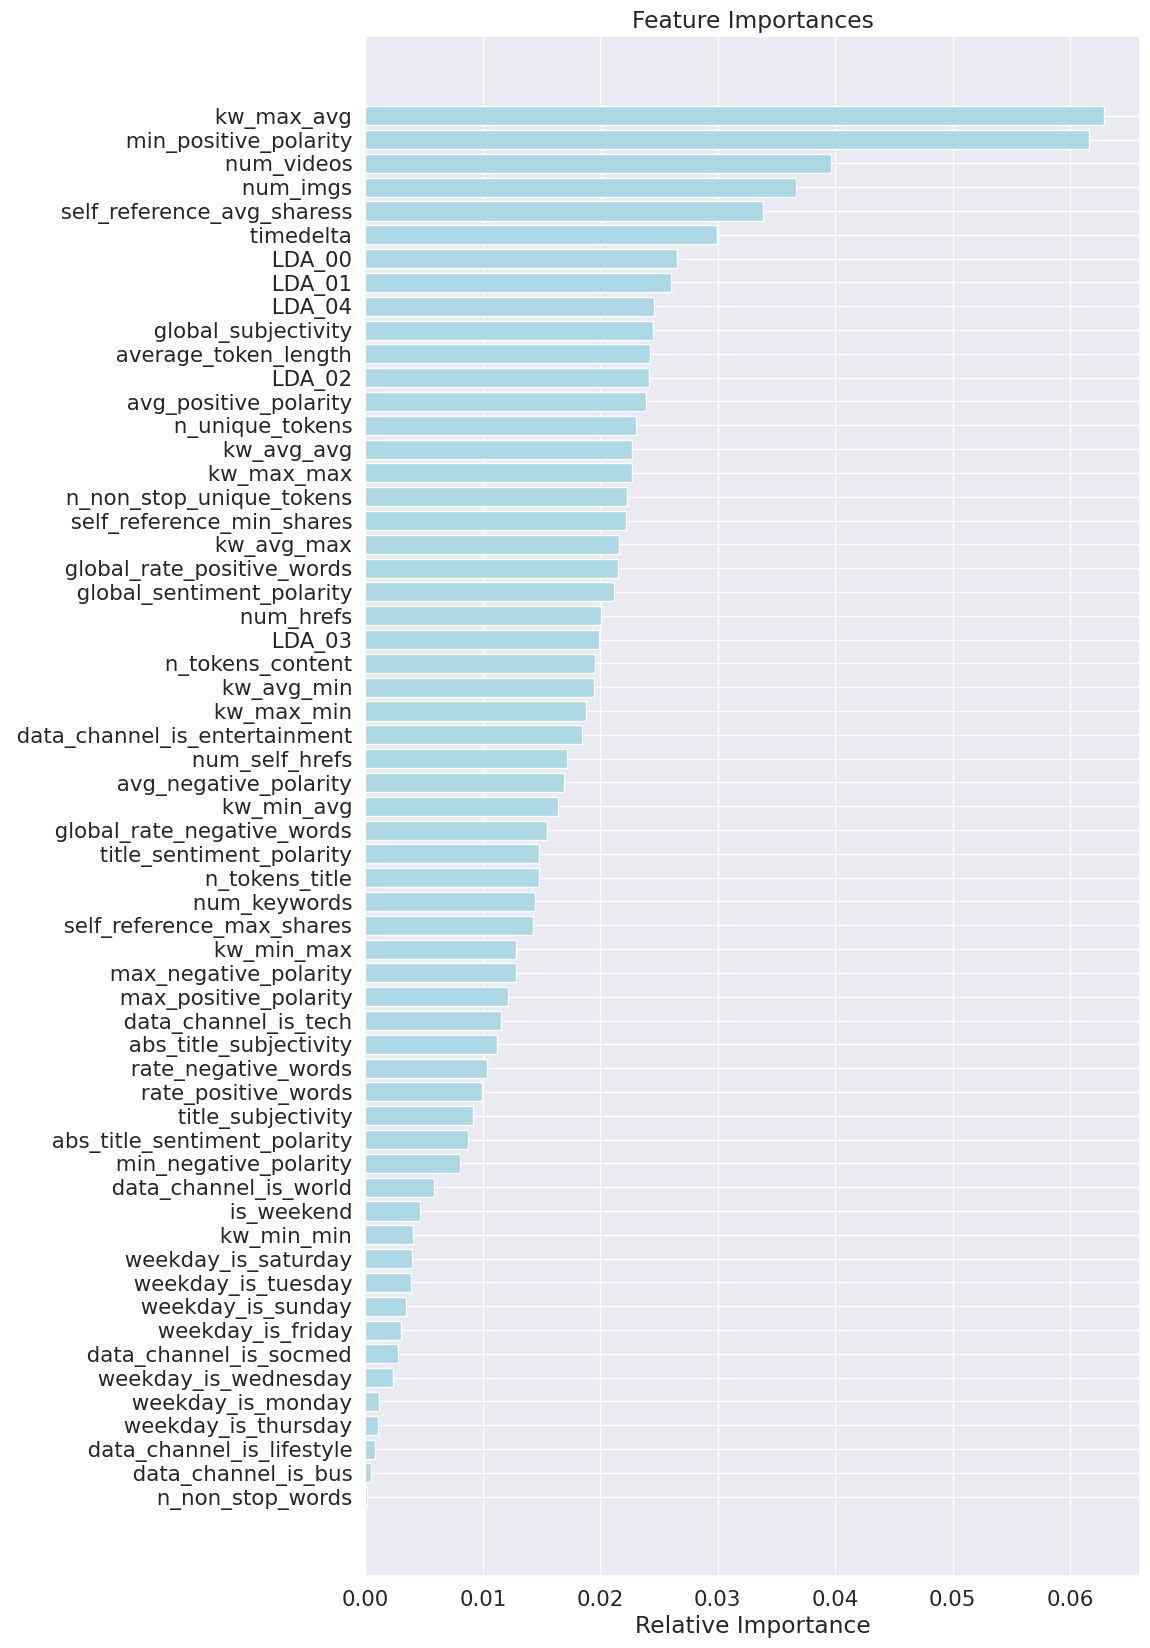

In [102]:
dt = DecisionTreeClassifier()
dt.fit(train, target_train)
dt_pred = dt.predict(test)
features = Df.columns
importance = dt.feature_importances_
indices = np.argsort(importance)
plt.figure(1,figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='lightblue', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [103]:
Model.append('Decision Tree')
Accuracy.append(accuracy_score(target_val,dt_pred))
F1Score.append(f1_score(target_val,dt_pred,average=None))

<Axes: xlabel='Predicted', ylabel='Actual'>

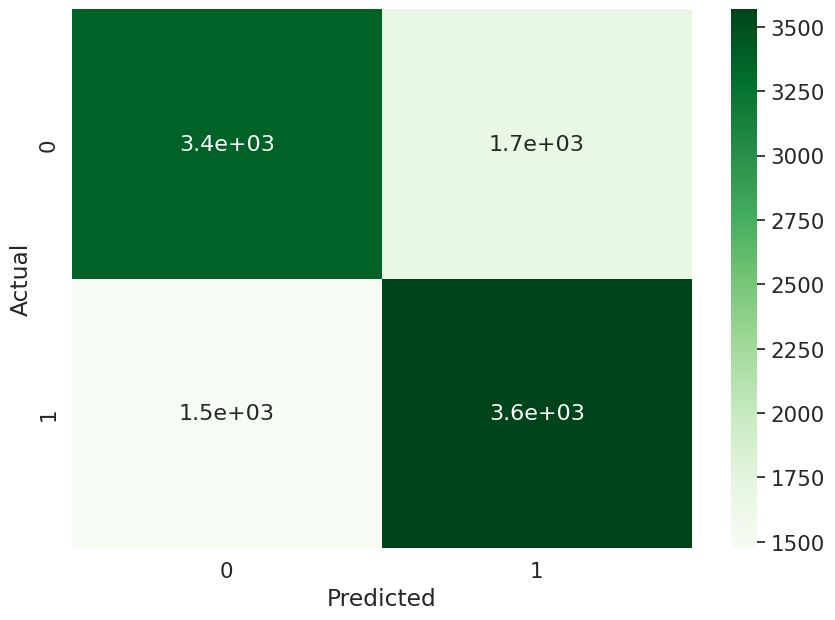

In [105]:
data = confusion_matrix(target_val,dt_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 16})

In [113]:
test_score_dt = dt.score(test, target_val)

print("Decision Tree Test Score:", test_score_dt)

Decision Tree Test Score: 0.6874876262126312


# Naive

In [107]:
naiveClassifier=GaussianNB()
naiveClassifier.fit(train, target_train)
naiveClassifier_pred = naiveClassifier.predict(test)

In [108]:
Model.append('Naive')
Accuracy.append(accuracy_score(target_val,naiveClassifier_pred))
F1Score.append(f1_score(target_val,naiveClassifier_pred,average=None))

<Axes: xlabel='Predicted', ylabel='Actual'>

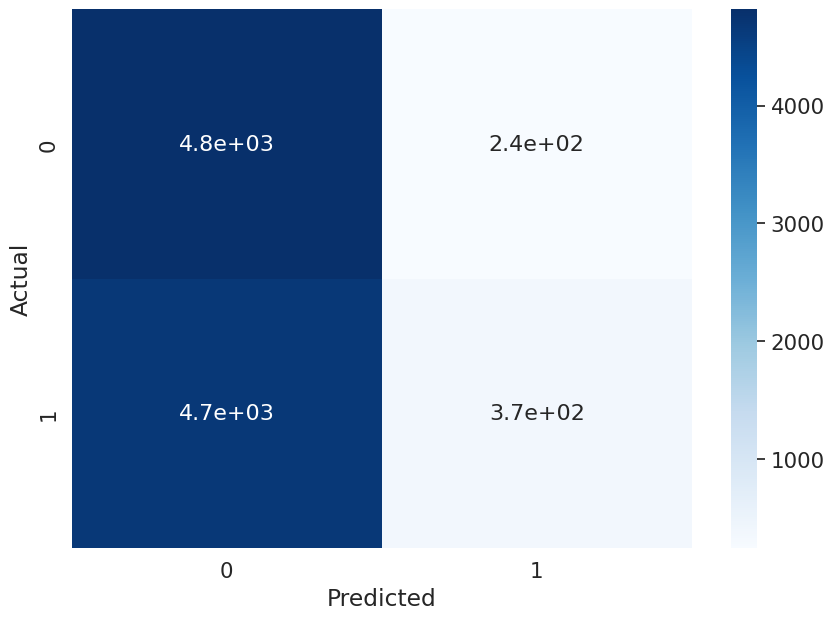

In [109]:
data = confusion_matrix(target_val,naiveClassifier_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [111]:
test_score = naiveClassifier.score(test, target_val)
print("Test Score:", test_score)

Test Score: 0.5135616709562463


# Comparing the models

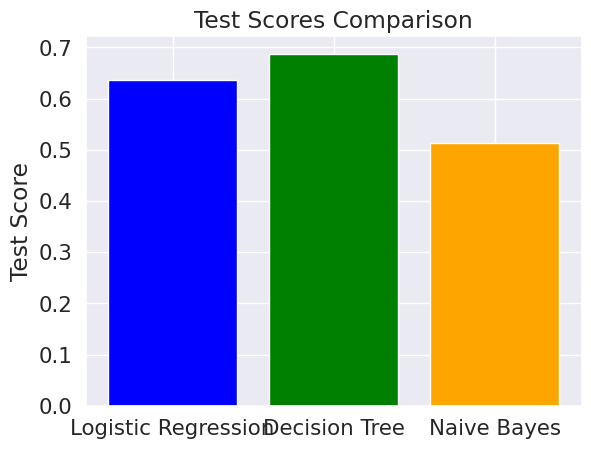

In [114]:
import matplotlib.pyplot as plt

# Assuming you have the test scores for each model
lr_test_score = LR.score(test, target_val)
dt_test_score = dt.score(test, target_val)
naive_test_score = naiveClassifier.score(test, target_val)

# Creating a bar plot
models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes']
test_scores = [lr_test_score, dt_test_score, naive_test_score]

plt.bar(models, test_scores, color=['blue', 'green', 'orange'])
plt.title('Test Scores Comparison')
plt.ylabel('Test Score')
plt.show()

In [115]:
lr_test_score = LR.score(test, target_val)
dt_test_score = dt.score(test, target_val)
naive_test_score = naiveClassifier.score(test, target_val)

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Naive Bayes'],
    'Test Score': [lr_test_score, dt_test_score, naive_test_score]
})

print(results_df)

                 Model  Test Score
0  Logistic Regression    0.636508
1        Decision Tree    0.687488
2          Naive Bayes    0.513562


# Tensorflow

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(256, input_shape=train.shape[1:], activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [120]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [117]:
model.evaluate(test, target_val)

316/316 [==============================] - 1s 3ms/step - loss: 0.9159 - accuracy: 0.4993


[0.9159401059150696, 0.4993070662021637]